## **Mounting Drive Folder on colab**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [25]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## **Importing libraries**

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for Aromatase**

In [27]:
# Target search for aromatase
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


### **Select and retrieve bioactivity data for *Human Aromatase* (first entry)**

We will assign the first entry (which corresponds to the target protein, *Human Aromatase*) to the ***selected_target*** variable 

In [28]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [29]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [30]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data_raw.csv**.

In [31]:
df.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [32]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-32-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [33]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,None,24377180,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,1.002
2920,None,24377181,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.9
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [34]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2919,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0
2920,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0
2921,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0
2922,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0


Save dataframe to CSV file

In [35]:
df3.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [36]:
df4 = pd.read_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_02_bioactivity_data_preprocessed.csv')

In [37]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [38]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active


Save dataframe to CSV file

In [39]:
df5.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_03_bioactivity_data_curated.csv', index=False)

## **Install conda and rdkit**

In [40]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-04-27 00:13:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   208MB/s    in 0.4s    

2023-04-27 00:13:10 (208 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [41]:
df = pd.read_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active


In [42]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [43]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [44]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2090,CHEMBL5087363,1002.0,intermediate,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2091,CHEMBL5092560,900.0,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2092,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2093,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [45]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [46]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [47]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2090,306.365,3.81630,2.0,4.0
2091,345.442,5.33750,2.0,3.0
2092,331.415,4.94740,2.0,3.0
2093,334.419,4.66560,3.0,3.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [48]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2090,306.365,3.81630,2.0,4.0
2091,345.442,5.33750,2.0,3.0
2092,331.415,4.94740,2.0,3.0
2093,334.419,4.66560,3.0,3.0


In [49]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active


Now, let's combine the 2 DataFrame

In [50]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,1002.0,intermediate,306.365,3.81630,2.0,4.0
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,900.0,active,345.442,5.33750,2.0,3.0
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate,331.415,4.94740,2.0,3.0
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active,334.419,4.66560,3.0,3.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [51]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [52]:
df_combined.standard_value.describe()

count      2095.000000
mean      14480.416388
std       50991.930113
min           0.000000
25%         130.000000
50%        1252.000000
75%        8760.000000
max      777000.000000
Name: standard_value, dtype: float64

In [53]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [54]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-53-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,306.365,3.81630,2.0,4.0,1002.0
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,345.442,5.33750,2.0,3.0,900.0
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,331.415,4.94740,2.0,3.0,3240.0
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,334.419,4.66560,3.0,3.0,52.0


In [55]:
df_norm.standard_value_norm.describe()

count      2095.000000
mean      14480.416388
std       50991.930113
min           0.000000
25%         130.000000
50%        1252.000000
75%        8760.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [56]:
df_final = pIC50(df_norm)
df_final

<ipython-input-51-c0835655dc17>:8: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-51-c0835655dc17>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,306.365,3.81630,2.0,4.0,5.999132
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,345.442,5.33750,2.0,3.0,6.045757
2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,331.415,4.94740,2.0,3.0,5.489455
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,334.419,4.66560,3.0,3.0,7.283997


In [57]:
df_final.pIC50.describe()

count    2095.000000
mean             inf
std              NaN
min         3.109579
25%         5.057500
50%         5.902396
75%         6.886057
max              inf
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [58]:
df_final.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class and class with infinity values**

Here, we will be removing the ``intermediate`` class and class with ``infinity`` value from our data set.

In [59]:
df_2class = df_final[df_final['class'] != 'intermediate']

# Remove infinity values
df_2class.replace([np.inf, -np.inf], np.nan, inplace=True)
df_2class.dropna(inplace=True)

df_2class

<ipython-input-59-016ea724cb37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-59-016ea724cb37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class.dropna(inplace=True)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2088,CHEMBL5069811,CC(Cc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,317.388,4.55730,2.0,3.0,6.064997
2089,CHEMBL5072101,CCC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,320.392,4.20640,2.0,4.0,7.455932
2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,345.442,5.33750,2.0,3.0,6.045757
2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,334.419,4.66560,3.0,3.0,7.283997


Let's write this to CSV file.

In [60]:
df_2class.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [61]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

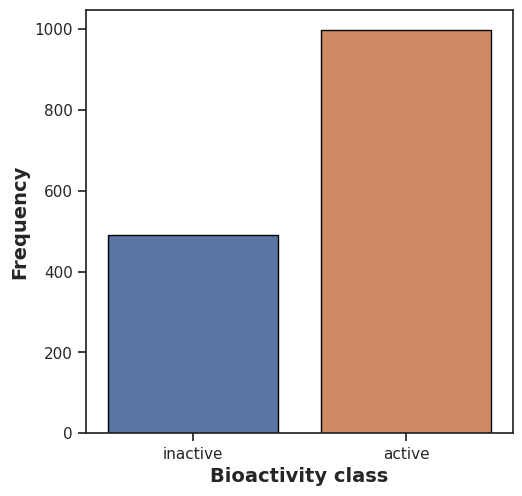

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

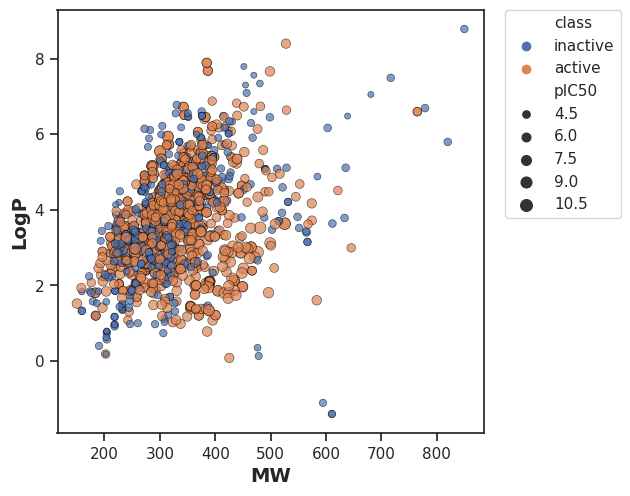

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

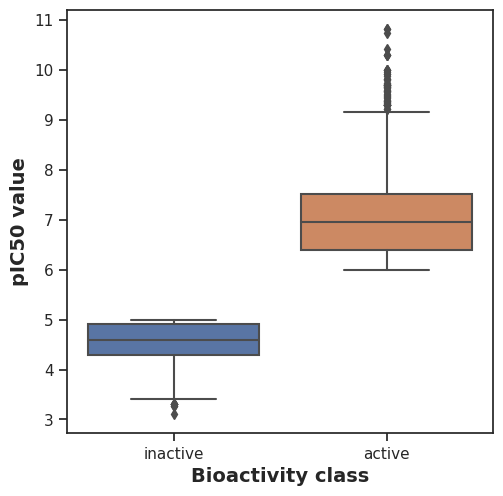

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [65]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [66]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,490018.0,1.352019e-216,0.05,Different distribution (reject H0)


#### **MW**

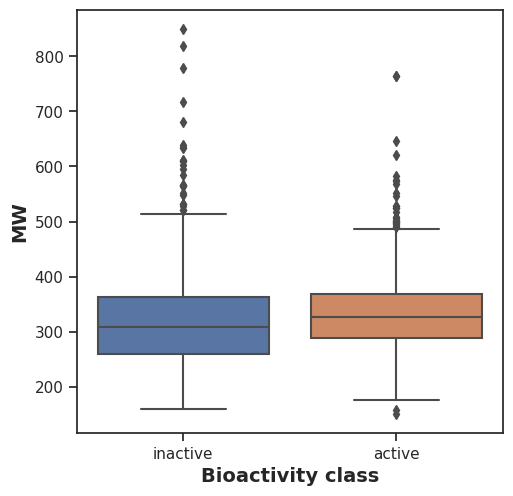

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [68]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,278126.0,0.000022,0.05,Different distribution (reject H0)


#### **LogP**

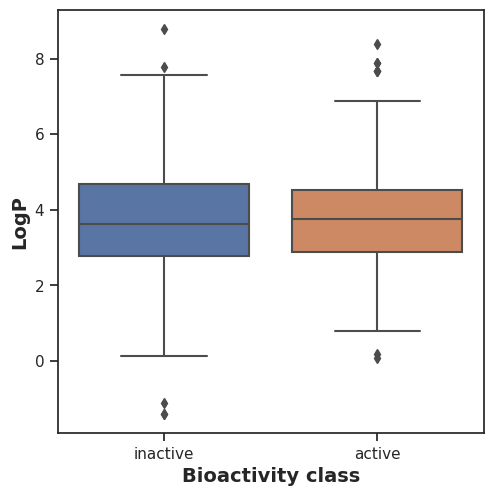

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [70]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,245759.0,0.923452,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

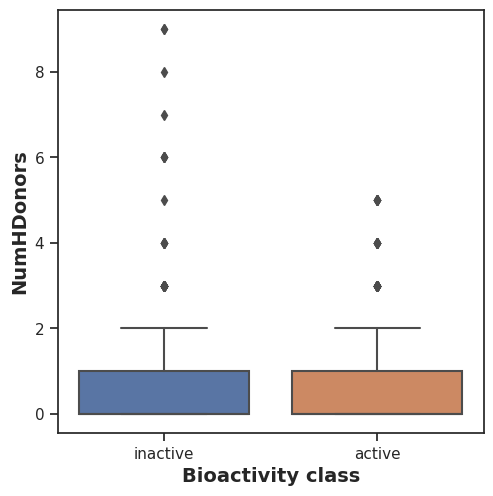

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [72]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,230440.5,0.035666,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

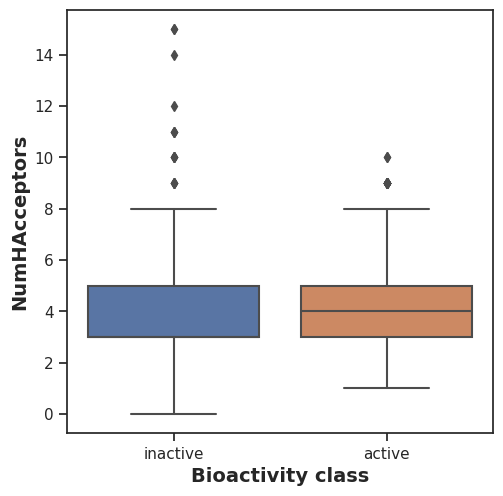

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [74]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,262911.0,0.019424,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [75]:
! zip -r plots.zip . -i *.csv *.pdf

Scanning files 
  adding: plot_MW.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_NumHDonors.pdf (deflated 38%)


In [76]:
#Moving plots.zip to drive
import shutil

shutil.move('plots.zip', '/content/drive/MyDrive/Colab Notebooks/aromatase/plots.zip')


'/content/drive/MyDrive/Colab Notebooks/aromatase/plots.zip'

## **Download PaDEL-Descriptor**

---



In [77]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-04-27 00:15:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-04-27 00:15:10--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.07s   

2023-04-27 00:15:10 (341 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-04-27 00:15:10--  https://github

In [78]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [79]:
df3 = pd.read_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
2090,2090,CHEMBL5087363,CC(Cn1ccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,306.365,3.81630,2.0,4.0,5.999132
2091,2091,CHEMBL5092560,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,345.442,5.33750,2.0,3.0,6.045757
2092,2092,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,intermediate,331.415,4.94740,2.0,3.0,5.489455
2093,2093,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,active,334.419,4.66560,3.0,3.0,7.283997


In [80]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [81]:
! cat molecule.smi | head -5

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [82]:
! cat molecule.smi | wc -l

2095


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [83]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [84]:
! bash padel.sh

Processing CHEMBL341591 in molecule.smi (1/2095). 
Processing CHEMBL2111947 in molecule.smi (2/2095). 
Processing CHEMBL431859 in molecule.smi (3/2095). Average speed: 9.39 s/mol.
Processing CHEMBL113637 in molecule.smi (4/2095). Average speed: 4.75 s/mol.
Processing CHEMBL112021 in molecule.smi (5/2095). Average speed: 3.88 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2095). Average speed: 2.97 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2095). Average speed: 2.59 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2095). Average speed: 2.27 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2095). Average speed: 1.97 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2095). Average speed: 1.82 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2095). Average speed: 1.62 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2095). Average speed: 1.53 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2095). Average speed: 1.39 s/mol.
Processing CHEMBL41066 in molecule.smi (14/2095)

In [85]:
! ls -l

total 112408
-rw-r--r-- 1 root root  3734934 Apr 27 00:25 descriptors_output.csv
drwx------ 6 root root     4096 Apr 26 23:16 drive
drwxr-xr-x 3 root root     4096 Apr 27 00:15 __MACOSX
-rw-r--r-- 1 root root      122 Apr 27 00:15 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Apr 27 00:15 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Apr 27 00:15 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Apr 27 00:15 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      127 Apr 27 00:15 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   121332 Apr 27 00:15 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Apr 27 00:15 padel.sh
-rw-r--r-- 1 root root 25768637 Apr 27 00:15 padel.zip
-rw-r--r-- 1 root root    14070 Apr 27 00:14 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    16813 Apr 27 00:15 plot_ic50.pdf
-rw-r--r-- 1 root root

In [86]:
#Moving descriptors_output.csv to drive
import shutil

shutil.move('descriptors_output.csv', '/content/drive/MyDrive/DrugDiscovery/aromatase/descriptors_output.csv')


'/content/drive/MyDrive/DrugDiscovery/aromatase/descriptors_output.csv'

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [87]:
df3_X = pd.read_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,CHEMBL5087363,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2091,CHEMBL5092560,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2092,CHEMBL5092843,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2093,CHEMBL5074047,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Y variable**

#### **Convert IC50 to pIC50**

In [89]:
df3_Y = df3['pIC50']
df3_Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2090    5.999132
2091    6.045757
2092    5.489455
2093    7.283997
2094    7.200659
Name: pIC50, Length: 2095, dtype: float64

### **Combining X and Y variable**

In [90]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.999132
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.489455
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.283997


In [91]:
dataset3.to_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

**Building Machine Learning Models using our data**

## **Import libraries**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Load the data set**

In [93]:
df = pd.read_csv('/content/drive/MyDrive/DrugDiscovery/aromatase/aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df[df['pIC50'] <= np.finfo(np.float64).max]

## **Features**
The ***Aromatase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **Input features**

In [94]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Output features**

In [95]:
Y = df.pIC50
Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2090    5.999132
2091    6.045757
2092    5.489455
2093    7.283997
2094    7.200659
Name: pIC50, Length: 2094, dtype: float64

### **Let's examine the data dimension**

In [96]:
X.shape

(2094, 881)

In [97]:
Y.shape

(2094,)

### **Remove low variance features**

In [98]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [99]:
X.shape

(2094, 160)

## **Data split (80/20 ratio)**

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =42)

In [101]:
X_train.shape, Y_train.shape

((1675, 160), (1675,))

In [102]:
X_test.shape, Y_test.shape

((419, 160), (419,))

## **Building a Regression Model using Random Forest**

In [103]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.47878765974368154

In [104]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

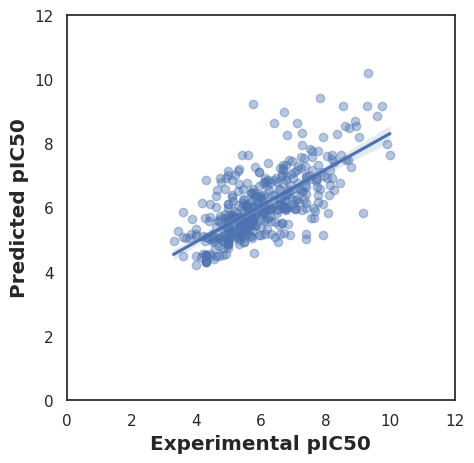

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Comparing different Machine Learning Models**

### **Importing Libraries**

In [106]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 31.3 MB/s 
     |████████████████████████████████| 96 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 38.9 MB/s 
     |████████████████████████████████| 255.9 MB 36 kB/s 
     |████████████████████████████████| 297 kB 52.4 MB/s 
     |████████████████████████████████| 38.1 MB 210 kB/s 


In [107]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

### **Lazy Predictor**

In [108]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [03:03<00:00,  4.38s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:37<00:00,  3.75s/it]


In [109]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.82,0.84,0.52,0.14
ExtraTreeRegressor,0.82,0.84,0.52,0.14
ExtraTreesRegressor,0.82,0.84,0.52,5.69
GaussianProcessRegressor,0.82,0.84,0.52,2.61
XGBRegressor,0.81,0.83,0.54,10.37
RandomForestRegressor,0.78,0.80,0.58,2.40
BaggingRegressor,0.76,0.78,0.61,0.40
HistGradientBoostingRegressor,0.68,0.71,0.70,16.56
MLPRegressor,0.67,0.70,0.71,2.90


In [110]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.16,0.48,0.90,1.91
GradientBoostingRegressor,0.13,0.46,0.91,1.28
SVR,0.13,0.46,0.92,0.40
HistGradientBoostingRegressor,0.13,0.46,0.92,9.46
NuSVR,0.12,0.46,0.92,0.61
LGBMRegressor,0.12,0.46,0.92,0.22
XGBRegressor,0.11,0.45,0.92,1.31
BaggingRegressor,0.11,0.45,0.92,0.38
RidgeCV,0.08,0.43,0.94,0.12


## **Data visualization of model performance**

[(0.0, 1.0)]

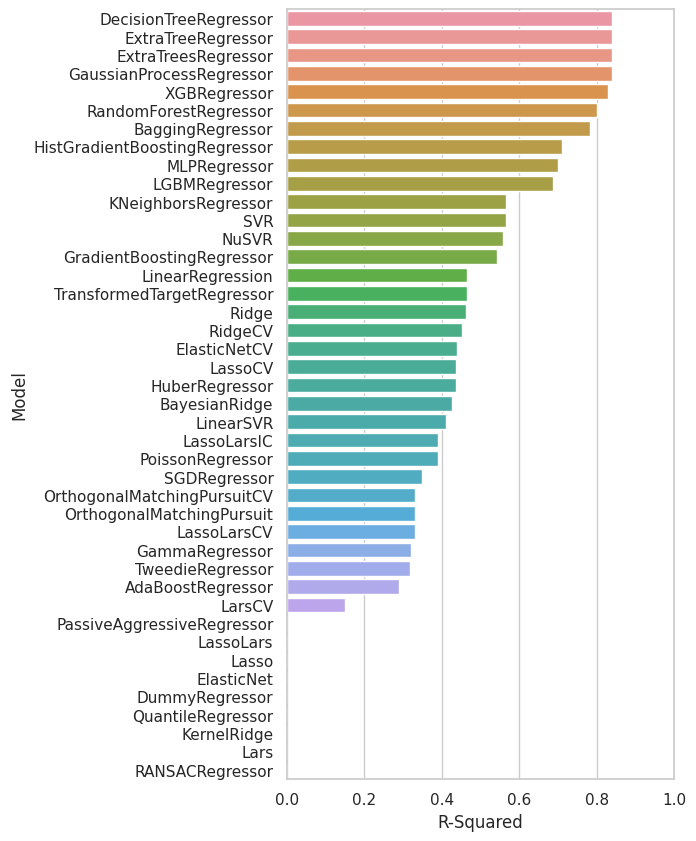

In [111]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

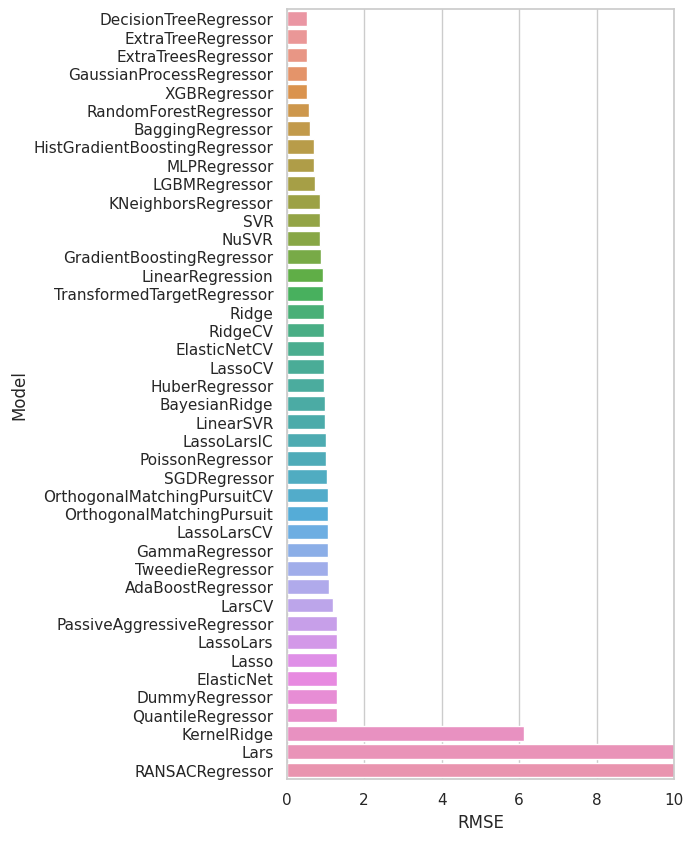

In [112]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

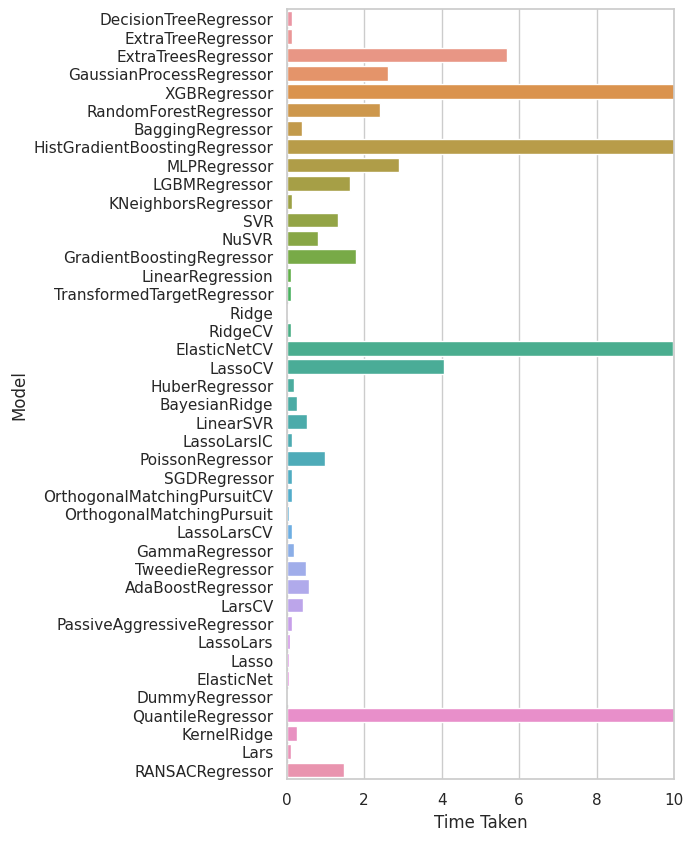

In [113]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))